# Summary of Auto data collection of Iodide exchange at Lab

In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pcd
import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

In [2]:
plt.close('all')

## Plotting parameters

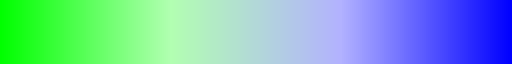

In [3]:
# palette = pcd.RdYlGn_4_r
palette = pld.BlueGreen_4_r
cmap = palette.mpl_colormap
# cmap = cmap=plt.get_cmap('tab10')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5
cmap

In [4]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM'

## Labeling and Title

In [5]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
# print(*title, sep='\n')

title = ['Insitu CsPb 6mM + Br 12 mM + ZnCl2 8uL/min',
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 16uL/min', 
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 32uL/min',
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 64uL/min', 
         'Insitu CsPb 6mM + Br 12 mM + Zncl2 128uL/min', 
         ]

label = ['ZnCl2 8 uL/min',
         'ZnCl2 16 uL/min', 
         'ZnCl2 32 uL/min',
         'ZnCl2 64 uL/min',
         'ZnCl2 128 uL/min', 
         ]

bg_dic = { '008ul':[], 
           '016ul':[], 
           '032ul':[], 
           '064ul':[], 
           '0128ul':[], 
         }


In [6]:
list(bg_dic.keys())

['008ul', '016ul', '032ul', '064ul', '0128ul']

## Categorize data into two parts: 
### (1) bad/good data identification --> stream name: "primary"

In [7]:
bg_fitted= glob.glob(cwd + '/**_fitted.csv')
bg_fitted.sort()
# del subfolder[-1]
print(*[os.path.basename(i) for i in bg_fitted], sep = '\n')  ## Print one element per line
len(bg_fitted)

CsPbI3_008ul_PL_20230526-164446_96514bc4_fitted.csv
CsPbI3_008ul_PL_20230526-164456_65f9e6f4_fitted.csv
CsPbI3_008ul_PL_20230526-164506_d2a9af84_fitted.csv
CsPbI3_008ul_PL_20230526-164516_cdbf0610_fitted.csv
CsPbI3_008ul_PL_20230526-164526_6455087a_fitted.csv
CsPbI3_008ul_PL_20230526-164536_1276aa48_fitted.csv
CsPbI3_016ul_PL_20230526-170557_af15c393_fitted.csv
CsPbI3_016ul_PL_20230526-170607_642ac039_fitted.csv
CsPbI3_016ul_PL_20230526-170617_1b09a14d_fitted.csv
CsPbI3_016ul_PL_20230526-170626_b6710a3d_fitted.csv
CsPbI3_016ul_PL_20230526-170636_0c0fc979_fitted.csv
CsPbI3_016ul_PL_20230526-170646_20c9ca9e_fitted.csv
CsPbI3_032ul_PL_20230526-172611_408a9004_fitted.csv
CsPbI3_032ul_PL_20230526-172621_5146641b_fitted.csv
CsPbI3_032ul_PL_20230526-172631_92aa9e0a_fitted.csv
CsPbI3_032ul_PL_20230526-172640_2075c8bf_fitted.csv
CsPbI3_032ul_PL_20230526-172650_7f6b1024_fitted.csv
CsPbI3_032ul_PL_20230526-172700_8827e8ab_fitted.csv
CsPbI3_064ul_PL_20230526-174454_f9b47b15_fitted.csv
CsPbI3_064ul

20

### Sort bad/good data into bg_dic according to condicitons

In [8]:
for key in bg_dic.keys():
    for fn in bg_fitted:
        if key in fn:
            bg_dic[key].append(fn)
len(bg_dic['008ul'])

6

### (2) insterested data --> steeam name: "fluorescence"

In [9]:
in_data = glob.glob(cwd + '/**fluorescence')
in_data.sort()
# del subfolder[-1]
# print(*in_data, sep = '\n')  ## Print one element per line
in_data

['/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM/20230526164543_0282ed38_fluorescence',
 '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM/20230526170653_40f7ebf6_fluorescence',
 '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM/20230526172707_6154770b_fluorescence',
 '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM/20230526174502_0909664b_fluorescence',
 '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230526_CsPbBr_ZnCl_6mM/20230526180600_0254eb63_fluorescence']

## Reading dark and reference

In [10]:
dark = glob.glob(cwd + '/' + 'Dark**.csv')
ref = glob.glob(cwd + '/' + 'Tol_OA**.csv')

dark_df = pd.read_csv(dark[0], skiprows=7, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=7, sep=',')

## Plot all raw data

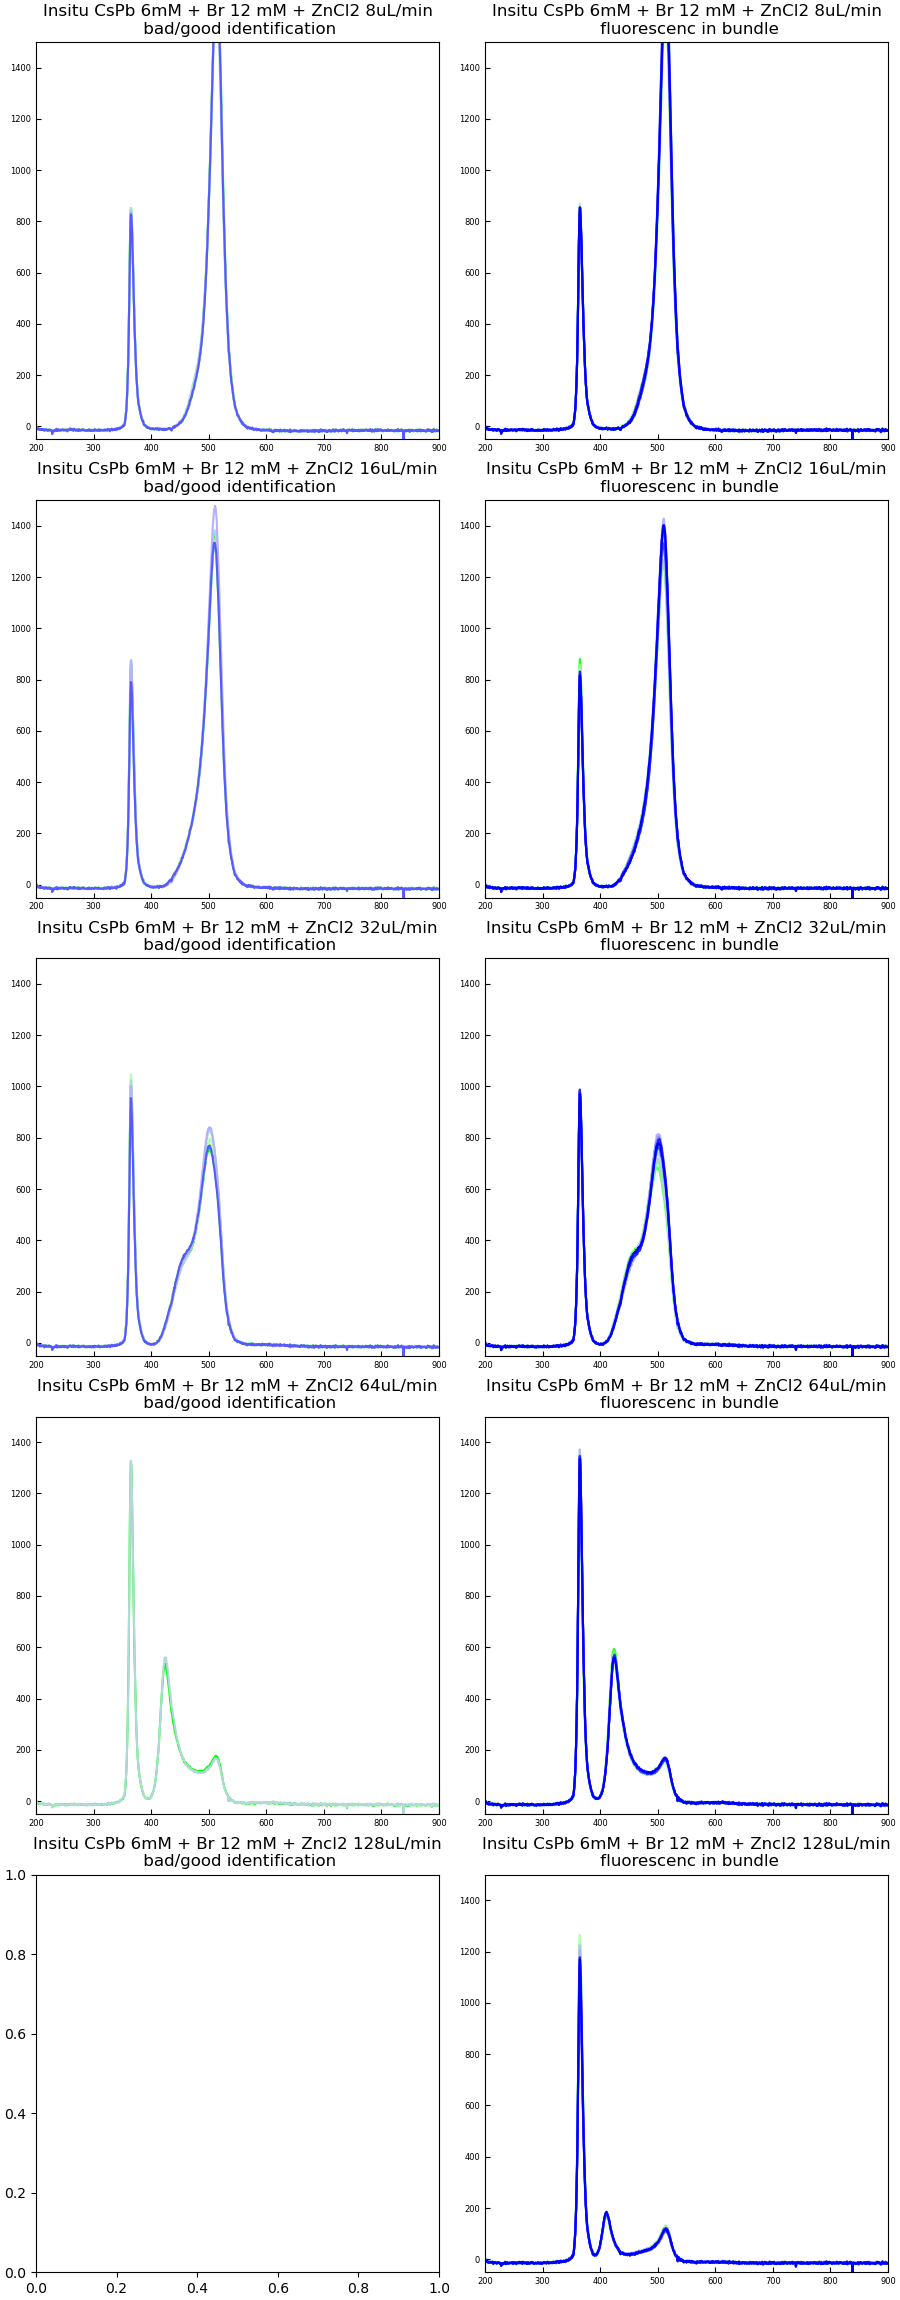

In [11]:
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(len(label), 2, figsize = (9, 23), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 245
w2 = 600


for i, key, in zip(range(len(label)), bg_dic.keys()):   
    ax1[i*2].set_title(title[i]+'\n bad/good identification', fontsize=12)
    df_i = pd.DataFrame()
    
    skiprows=13
    k1 = 0
    k2 = len(bg_dic[key])
    color_idx = np.linspace(0, 1, k2-k1+1)
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(bg_dic[key][j], skiprows=skiprows, sep=',')
        PL = df_j['Sample']-dark_df.Sample
        ax1[i*2].plot(df_j.Wavelength, PL, color=cmap(color_idx[j-k1]))
        ax1[i*2].set_xlim(200, 900)
        ax1[i*2].set_ylim(-50, 1500)
        ax1[i*2].tick_params(axis='both', direction='in', labelsize=6)
        
#         ## Insert Annotation
#         '''
#         at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
#         at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
#         ax1[i].add_artist(at)
#         '''
        
#         #df_i[f'Iten_{j}'] = df_j.intensity
#         df_i = pd.concat([df_i, PL], axis=1, ignore_index=True)
    
#     df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
#     #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
#     df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
#     x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
#     df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
# df['Wavelength'] = df_j.Wavelength
# df_norm['Wavelength'] = df_j.Wavelength.loc[w1:w2]
# #df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
# df_norm2.loc[0:w2-w1, 'Wavelength'] = df_j.Wavelength.loc[w1:w2].values


for ii, fn, in zip(range(len(label)), in_data):   
    ax1[ii*2+1].set_title(title[ii]+'\n fluorescenc in bundle', fontsize=12)
    df_i = pd.DataFrame()
    
    ff = glob.glob(fn + '/**.csv')
    ff.sort()
    skiprows=11
    k1 = 1
    k2 = len(ff)-1
    color_idx = np.linspace(0, 1, k2-k1+1)
    
    for jj in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(ff[jj], skiprows=skiprows, sep=',')
        PL = df_j['Sample']-dark_df.Sample
        ax1[ii*2+1].plot(df_j.Wavelength, PL, color=cmap(color_idx[jj]))
        ax1[ii*2+1].set_xlim(200, 900)
        ax1[ii*2+1].set_ylim(-50, 1500)
        ax1[ii*2+1].tick_params(axis='both', direction='in', labelsize=6)

## Plot fitted data coducted in Kafka

IndexError: list index out of range

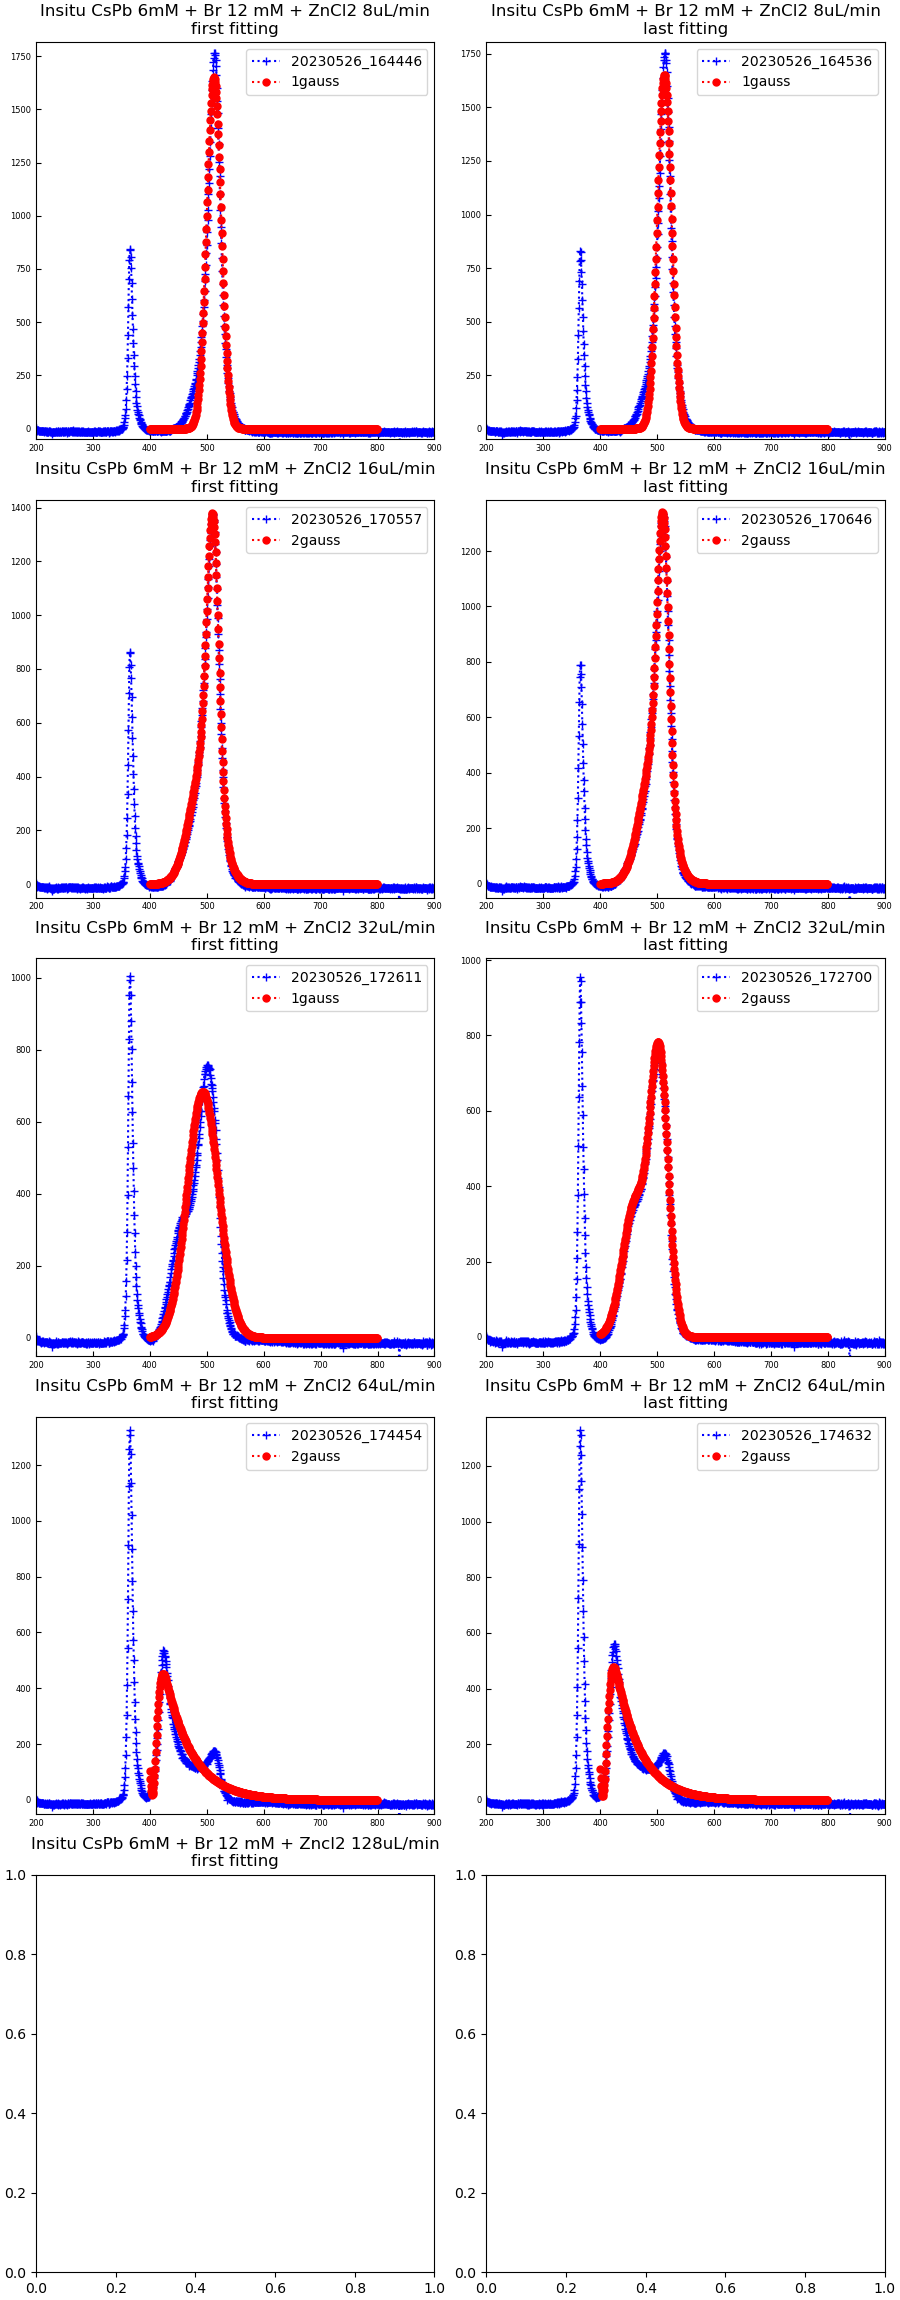

In [12]:
f2, ax2 = plt.subplots(len(label), 2, figsize = (9, 23), constrained_layout=True)
fit_function = {'_1gauss':_1gauss, '_2gauss':_2gauss, '_3gauss':_3gauss}
# ax2 = ax2.flatten()


## Wavelength range
x0 = df_j.Wavelength
w1, _ = find_nearest(x0, 340)
w2, _ = find_nearest(x0, 400)
w3, _ = find_nearest(x0, 800)

i=0
for key in bg_dic.keys():
    skiprows=13
    # k1 = 0
    # k2 = len(bg_dic[key])
    # color_idx = np.linspace(0, 1, k2-k1+1)
    
    for j, l in zip([0,-1],['first', 'last']):
        ax2[i,abs(j)].set_title(title[i]+'\n'+ l + ' fitting', fontsize=12)
        meta = _read_meta_csv(bg_dic[key][j], header=skiprows)
        
        df_j = pd.read_csv(bg_dic[key][j], skiprows=skiprows, sep=',')
        PL = df_j['Sample']-dark_df.Sample
        label = meta['Time_QEPro'][0]+'_'+meta['Time_QEPro'][1]
        l1, = ax2[i,abs(j)].plot(df_j.Wavelength, PL, 'b+:', label=label)
        ax2[i,abs(j)].set_xlim(200, 900)
        ax2[i,abs(j)].set_ylim(-50, max(PL)+50)

        popt = [float(k) for k in meta['popt']]
        fff = fit_function[meta['fitting function'][0]]
        label = fff.__name__[1:]
        x = df_j.Wavelength[w2:w3]
        y_fitted = fff(x, *popt)
        l2, =ax2[i,abs(j)].plot(x, y_fitted, 'ro:', markersize=5, label=label) 
        
        ax2[i,abs(j)].legend(handles=[l1,l2])
        ax2[i,abs(j)].tick_params(axis='both', direction='in', labelsize=6)
        
    i += 1


In [13]:
key

'0128ul'

## Test good_bad_data in _data_analysis.py

In [14]:
bg_128= glob.glob(cwd + '/**128**.csv')
bg_128.sort()
# del subfolder[-1]
print(*[os.path.basename(i) for i in bg_128], sep = '\n')  ## Print one element per line
len(bg_128)

CsPbI3_128ul_PL_20230526-180230_f32f6451.csv
CsPbI3_128ul_PL_20230526-180239_c05a237b.csv
CsPbI3_128ul_PL_20230526-180249_f984255e.csv
CsPbI3_128ul_PL_20230526-180258_fd766ee8.csv
CsPbI3_128ul_PL_20230526-180308_da3b0b13.csv
CsPbI3_128ul_PL_20230526-180318_6c7349ba.csv
CsPbI3_128ul_PL_20230526-180557_d7ad1096.csv
CsPbI3_128ul_PL_20230526-180730_e728818d.csv
CsPbI3_128ul_PL_20230526-180740_e7fa7aaa.csv
CsPbI3_128ul_PL_20230526-180750_f94806f3.csv
CsPbI3_128ul_PL_20230526-180800_17ddb708.csv
CsPbI3_128ul_PL_20230526-180809_631298d7.csv


12

In [15]:
df = pd.read_csv(bg_128[-1], skiprows=11, sep=',')
df.keys()

Index(['Wavelength', 'Dark', 'Sample', 'Fluorescence'], dtype='object')

In [16]:
x0 = df['Wavelength'].values
y0 = df['Fluorescence'].values
peak, prop = good_bad_data(x0,y0, key_height=100, height=100)
peak, prop

test passes c1 so is good.


(array([267, 403]), {'peak_heights': [199.91666666666663, 115.80555555555554]})

In [17]:
w4, _ = find_nearest(x0, 390)
w5, _ = find_nearest(x0, 540)
x1 = df['Wavelength'][w4:w5].values
y1 = df['Fluorescence'][w4:w5].values
popt, _ = _2peak_fit_good_PL(x1, y1, _2gauss, peak=peak-w4)

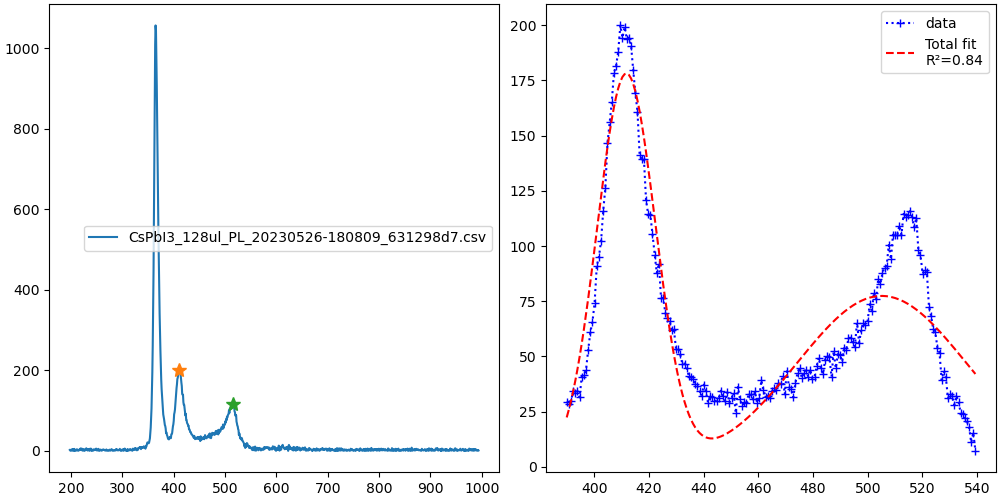

In [18]:
f3, ax3 = plt.subplots(1, 2, figsize = (10, 5), constrained_layout=True)
ax3[0].plot(x0, y0, label=os.path.basename(bg_128[-1]))

for i in peak:
    ax3[0].plot(x0[i], y0[i], '*', markersize=10)

ax3[0].legend()

ax3[1].plot(x1,y1, 'b+:', label='data')

y_fitted = _2gauss(x1, *popt)
r_2 = r_square(x1, y1, y_fitted)
r2 = f'R\u00b2={r_2:.2f}'

ax3[1].plot(x1, y_fitted, 'r--', label='Total fit\n'+r2)
ax3[1].legend()